Thanks to Bayes' Theorem we know this:

Let:

$ H $ be the hypothesis

$ E $ be the evidence

$ P(H|E) \propto P(E|H) P(H) $

In other words:

Posterior $ \propto $ Likelihood * Prior

What happens when the posterior is very difficult or impossible to find?

We can find a sample from the posterior using the Markov Chain Monte Carlo method. Specifically, we will use the Metropolis-Hastings algorithm.

#### Monte Carlo

Implies that this process is stochastic, or, will use randomness.

#### Markov Chain

Implies that some part of this uses the results of previous tries.



#### Metropolis-Hastings algorithm

We need a method to accept new values into the posterior distribution.

$ p $ is a candidate from the proposal distribution.

$ l $ is the last added to posterior distribution.

$ a = \frac{\textrm{Likelihood(p)}*\textrm{Prior(p)}}{\textrm{Likelihood(l)}*\textrm{Prior(l)}} $

If $ a >= 1$, then we accept the new state. It becomes part of our bag of data that we know is from the posterior distribution.

If $a < 1$ then we use this logic: draw from a uniform distribution between 0 and 1. Call it $ U $.

If $U < a$ then accept the $ p $. Add it to the posterior distribution and mark it as $ l $.


Ah I think this is wrong in parts but it is good enough to give an idea for how it should work.

In [105]:
# Decide whether the proposed Mean is accepted or not
metropolisHastingsDecision = function(likelihoodProposed, priorProposed, likelihoodMeanLast, priorMeanLast) {
    proposedPosteriorDatum = (likelihoodProposed * priorProposed)
    lastPosteriorDatum = (likelihoodMeanLast * priorMeanLast)
    acceptanceProbability = proposedPosteriorDatum/lastPosteriorDatum

    if (acceptanceProbability >= 1) {
        return(TRUE)
    }
    randomUniform = runif(1, 0, 1)
    if (randomUniform < acceptanceProbability) {
        return(TRUE)
    }
    return(FALSE)
}

[1] 82.50968


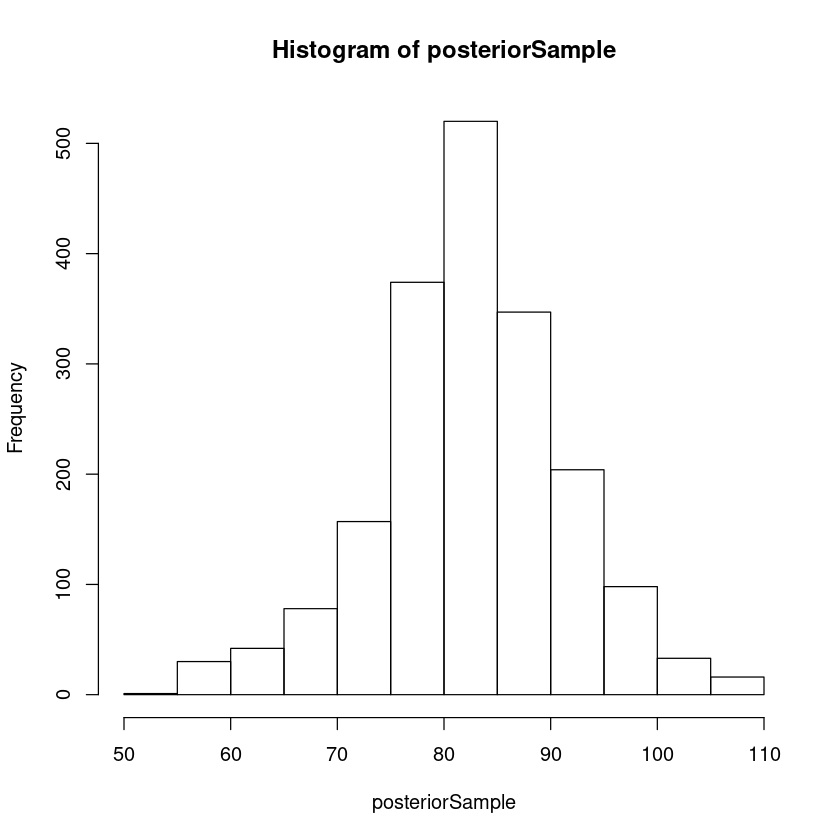

In [132]:
posteriorSample = c() # the posterior is (assumed) hard to know but we can get a sample from it using this MCMC method

# This is what we have control over, spend time defining this
priorDistribution = function(p) {
    mean = 81
    STD = sqrt(100)
    (dnorm(p, mean, STD))
}

# This is the model
likelihoodDistribution = function(p) {
    mean = 85
    STD = sqrt(110)
    (dnorm(p, mean, STD))
}

# This is arbitrary and acts as a discovery method, but these will be accepted or rejected later.
proposalDistribution = function(mean, STD) {
    (rnorm(n=1, mean, STD))
}

iterations = 2000
burnIn = 100 # Throw away this many first iterations, as they might depend too much on initial parameters
meanSeed = 80 # The meanSeed is effectively not important, if burnIn is used
STDSeed = 2

meanLast = meanSeed
STDLast= STDSeed # In this example, the STD won't change

for (i in 1:iterations) {
    meanProposed = proposalDistribution(meanLast, STDLast)

    likelihoodProposed = likelihoodDistribution(meanProposed)
    priorProposed = priorDistribution(meanProposed)
    likelihoodMeanLast = likelihoodDistribution(meanLast)
    priorMeanLast = priorDistribution(meanLast)

    if (metropolisHastingsDecision(likelihoodProposed, priorProposed, likelihoodMeanLast, priorMeanLast)) {
        posteriorSample = c(posteriorSample, meanProposed)
        meanLast = meanProposed
    } else {
        posteriorSample = c(posteriorSample, meanLast)
    }
}

if (burnIn > 0) {
    posteriorSample = posteriorSample[-c(1:burnIn)]
}

hist(posteriorSample)
print(mean(posteriorSample))
